In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/bank-marketing-dataset/bank.csv


In [2]:
bank = pd.read_csv('/kaggle/input/bank-marketing-dataset/bank.csv')

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


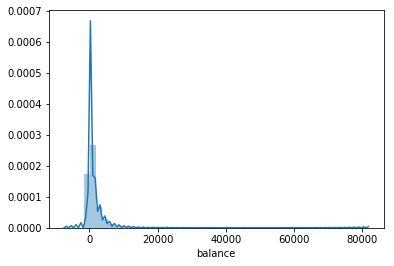

In [5]:
sns.distplot(bank['balance'])


/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


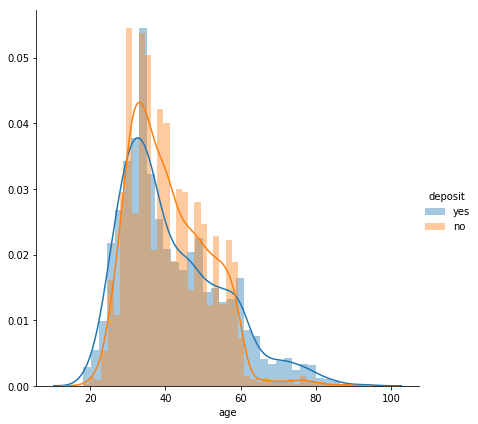

In [6]:

sns.FacetGrid(data=bank,hue='deposit',size=6).map(sns.distplot,'age').add_legend()

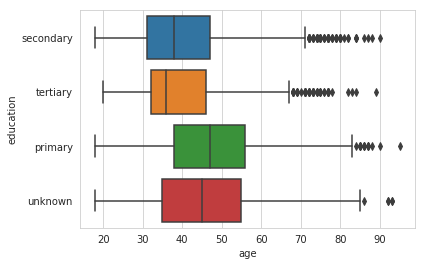

In [7]:
sns.set_style('whitegrid')
sns.boxplot(x='age',y='education',data=bank)


In [8]:
num1 = bank[['age','balance','day','duration','campaign','pdays','previous']]

In [9]:
cat = bank[['job','marital','education','housing','contact','month','poutcome','default','loan','deposit']]

In [10]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
cat1 = cat.apply(lab.fit_transform)

In [11]:
cat1

,job,marital,education,housing,contact,month,poutcome,default,loan,deposit
0,0,1,1,1,2,8,3,0,0,1
1,0,1,1,0,2,8,3,0,0,1
2,9,1,1,1,2,8,3,0,0,1
3,7,1,1,1,2,8,3,0,0,1
4,0,1,2,0,2,8,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...
11157,1,2,0,1,0,0,3,0,0,0
11158,7,1,1,0,2,6,3,0,0,0
11159,9,2,1,0,0,1,3,0,0,0
11160,9,1,1,0,0,8,0,0,1,0


In [12]:
data = num1.join(cat1)

In [13]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [14]:
data.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,housing,contact,month,poutcome,default,loan,deposit
0,59,2343,5,1042,1,-1,0,0,1,1,1,2,8,3,0,0,1
1,56,45,5,1467,1,-1,0,0,1,1,0,2,8,3,0,0,1
2,41,1270,5,1389,1,-1,0,9,1,1,1,2,8,3,0,0,1
3,55,2476,5,579,1,-1,0,7,1,1,1,2,8,3,0,0,1
4,54,184,5,673,2,-1,0,0,1,2,0,2,8,3,0,0,1


In [15]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,housing,contact,month,poutcome,default,loan,deposit
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169,-0.031603,-0.442782,-0.126018,-0.168700,0.027762,-0.026130,-0.002699,-0.011425,-0.031418,0.034901
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805,0.028736,-0.002138,0.051728,-0.077092,-0.027295,0.007264,-0.027151,-0.060954,-0.084589,0.081129
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981,0.026589,-0.003642,0.016759,-0.014770,0.007943,-0.019840,0.080221,0.017342,0.017269,-0.056326
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716,0.002432,0.006781,-0.019122,0.035051,-0.018000,-0.006482,0.042171,-0.009760,-0.001914,0.451919
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699,0.003104,-0.030794,-0.005327,0.006660,0.059258,-0.098123,0.112127,0.030975,0.034722,-0.128081
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272,-0.003385,0.031200,0.025165,0.064497,-0.227785,0.033631,-0.806533,-0.036282,-0.030416,0.151593
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000,0.012665,0.031281,0.022427,-0.000840,-0.169919,0.029283,-0.549333,-0.035273,-0.022668,0.139867
job,-0.031603,0.028736,0.026589,0.002432,0.003104,-0.003385,0.012665,1.000000,0.078314,0.147046,-0.136965,-0.087915,-0.076011,-0.004238,-0.007066,-0.067092,0.063395
marital,-0.442782,-0.002138,-0.003642,0.006781,-0.030794,0.031200,0.031281,0.078314,1.000000,0.125845,-0.036345,-0.060456,-0.004070,-0.039424,-0.014691,-0.062029,0.067610
education,-0.126018,0.051728,0.016759,-0.019122,-0.005327,0.025165,0.022427,0.147046,0.125845,1.000000,-0.109168,-0.132540,-0.055868,-0.040262,-0.010709,-0.073154,0.095948


In [16]:
X = data.drop('deposit',axis=1)

In [17]:
y = data['deposit']

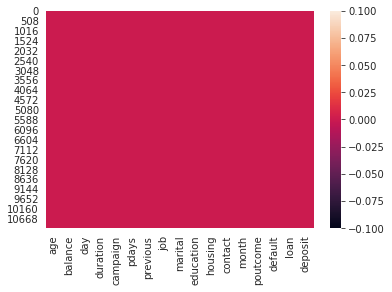

In [18]:
sns.heatmap(data.isnull())

As we see we have no missing values now we will move towards preprocessing steps

In [19]:
data.isnull().sum()

age          0
balance      0
day          0
duration     0
campaign     0
pdays        0
previous     0
job          0
marital      0
education    0
housing      0
contact      0
month        0
poutcome     0
default      0
loan         0
deposit      0
dtype: int64

In [20]:
X['pdays'].describe()

count    11162.000000
mean        51.330407
std        108.758282
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         20.750000
max        854.000000
Name: pdays, dtype: float64

Here....most of the entries in column 'pdays' is negative(i.e -1)

In [21]:
X = X.drop('pdays',axis=1)

In [22]:
X

,age,balance,day,duration,campaign,previous,job,marital,education,housing,contact,month,poutcome,default,loan
0,59,2343,5,1042,1,0,0,1,1,1,2,8,3,0,0
1,56,45,5,1467,1,0,0,1,1,0,2,8,3,0,0
2,41,1270,5,1389,1,0,9,1,1,1,2,8,3,0,0
3,55,2476,5,579,1,0,7,1,1,1,2,8,3,0,0
4,54,184,5,673,2,0,0,1,2,0,2,8,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,0,1,2,0,1,0,0,3,0,0
11158,39,733,16,83,4,0,7,1,1,0,2,6,3,0,0
11159,32,29,19,156,2,0,9,2,1,0,0,1,3,0,0
11160,43,0,8,9,2,5,9,1,1,0,0,8,0,0,1


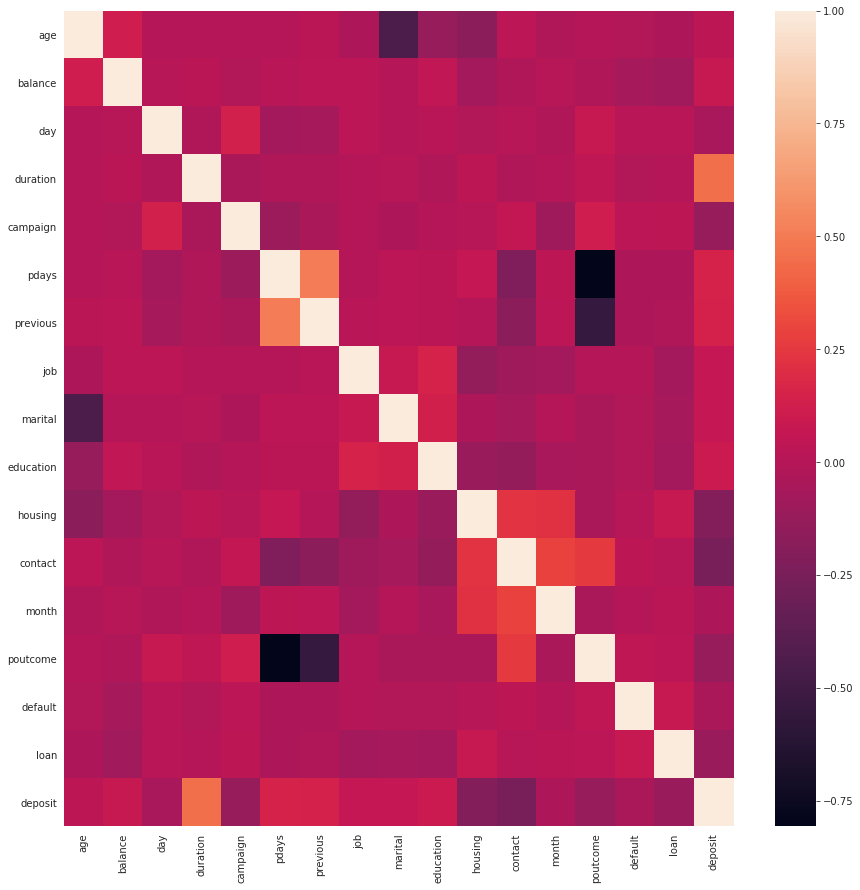

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr())

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import f_regression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
logit = LogisticRegression()
pred = logit.fit(X,y)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
pred.score(X,y)

0.7660813474287762

In [26]:
coef = pred.coef_

In [27]:
coef.round(3)

array([[ 0.001,  0.   , -0.005,  0.005, -0.213,  0.099, -0.065, -0.026,
         0.119, -0.435, -0.517,  0.002, -0.251, -0.014, -0.139]])

In [28]:
f_regression(X,y)

(array([  13.61029276,   73.94008591,   35.51890512, 2864.17224658,
         186.12989272,  222.67715914,   45.03270926,   51.24774573,
         103.69419513,  484.04546568,  743.02598081,   15.39967353,
         169.65173152,   18.49895681,  138.15305616]),
 array([2.26018006e-004, 9.12656825e-018, 2.60220290e-009, 0.00000000e+000,
        4.83132423e-042, 7.12533799e-050, 2.03156536e-011, 8.65285912e-013,
        3.01319680e-024, 4.72389457e-105, 1.89609195e-158, 8.75253849e-005,
        1.68153288e-038, 1.71443344e-005, 1.03740211e-031]))

In [29]:
p_values = f_regression(X,y)[1]

In [30]:
p_values

array([2.26018006e-004, 9.12656825e-018, 2.60220290e-009, 0.00000000e+000,
       4.83132423e-042, 7.12533799e-050, 2.03156536e-011, 8.65285912e-013,
       3.01319680e-024, 4.72389457e-105, 1.89609195e-158, 8.75253849e-005,
       1.68153288e-038, 1.71443344e-005, 1.03740211e-031])

In [31]:
regressor_OLS = sm.OLS(y,X)
result = regressor_OLS.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                deposit   R-squared (uncentered):                   0.646
Model:                            OLS   Adj. R-squared (uncentered):              0.645
Method:                 Least Squares   F-statistic:                              1355.
Date:                Sun, 29 Mar 2020   Prob (F-statistic):                        0.00
Time:                        04:31:05   Log-Likelihood:                         -5878.0
No. Observations:               11162   AIC:                                  1.179e+04
Df Residuals:                   11147   BIC:                                  1.190e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0037      0.000     13.987      0.000       0.003       0.004
balance     5.184e-06   1.22e-06      4.241      0.000    2.79e-06    7.58e-06
day           -0.0008      0.000     -1.860      0.063      -0.002    4.59e-05
duration       0.0007   1.11e-05     59.879      0.000       0.001       0.001
campaign      -0.0125      0.001     -8.571      0.000      -0.015      -0.010
previous       0.0243      0.002     12.352      0.000       0.020       0.028
job            0.0036      0.001      2.972      0.003       0.001       0.006
marital        0.0678      0.006     11.313      0.000       0.056       0.079
education      0.0480      0.005      9.316      0.000       0.038       0.058
housing       -0.1464      0.008    -18.157      0.000      -0.162      -0.131
contact       -0.1125      0.005    -21.231      0.000      -0.123      -0.102
month          0.0106      0.001      8.371      0.000       0.008       0.013
poutcome       0.0025      0.004      0.582      0.560      -0.006       0.011
default       -0.0412      0.032     -1.285      0.199      -0.104       0.022
loan          -0.1062      0.012     -9.133      0.000      -0.129      -0.083
==============================================================================
Omnibus:                      546.404   Durbin-Watson:                   0.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.034
Skew:                          -0.053   Prob(JB):                     6.11e-49
Kurtosis:                       2.317   Cond. No.                     2.95e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# ML Modelling****

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=101)

In [33]:
logit.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_pred = logit.predict(X_test)

In [35]:
print("Accuracy score is",accuracy_score(y_test,y_pred))


Accuracy score is 0.7626157061809495


In [36]:
print("Confusion matrix is\n",confusion_matrix(y_test,y_pred))
print("Classification report is\n",classification_report(y_test,y_pred))
print("F1 Score is",f1_score(y_test,y_pred))

Confusion matrix is
 [[1435  326]
 [ 469 1119]]
Classification report is
               precision    recall  f1-score   support

           0       0.75      0.81      0.78      1761
           1       0.77      0.70      0.74      1588

    accuracy                           0.76      3349
   macro avg       0.76      0.76      0.76      3349
weighted avg       0.76      0.76      0.76      3349

F1 Score is 0.7378832838773491


In [37]:
print("cross value score is",cross_val_score(logit,X,y,cv=5))

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


cross value score is [0.76130766 0.74070757 0.71012545 0.73969534 0.75716846]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# **Using GridSearchCV for Hyperparamter Testing**

In [38]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000],'max_iter' :[100, 500 , 1000]}]
grid_search = GridSearchCV(estimator = logit,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [39]:
grid_search.best_params_

{'C': 1000, 'max_iter': 1000}

In [40]:
grid_search.best_score_

0.7868916517777051

**Comparisn Between Basic Modelling and by GridSearchCV(Hyperparameter Testing)**

In [41]:
final = pd.DataFrame({'method' : ['Logit Reg Score','GridSearchCV Score'],'Result' :[accuracy_score(y_test,y_pred), grid_search.best_score_]})

In [42]:
final

,method,Result
0,Logit Reg Score,0.762616
1,GridSearchCV Score,0.786892
